In [1]:
import os
import h5py 
import numpy as np
import astropy.table as aTable

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
dat_dir = '/tigress/chhahn/provabgs/svda'
bgs = aTable.Table.read(os.path.join(dat_dir, 'BGS_ANY_full.provabgs.hdf5'))

In [4]:
fields = [
    ((bgs['RA'] > 140) & (bgs['RA'] < 160)), 
    ((bgs['RA'] > 160) & (bgs['RA'] < 185) & (bgs['DEC'] > -10) & (bgs['DEC'] < 10)), 
    ((bgs['RA'] > 205) & (bgs['RA'] < 212) & (bgs['DEC'] > 2) & (bgs['DEC'] < 8)), 
    ((bgs['RA'] > 210) & (bgs['RA'] < 224) & (bgs['DEC'] > -5) & (bgs['DEC'] < 5) & ~((bgs['RA'] > 205) & (bgs['RA'] < 212) & (bgs['DEC'] > 2) & (bgs['DEC'] < 8))),
    ((bgs['RA'] > 190) & (bgs['RA'] < 200) & (bgs['DEC'] > 20) & (bgs['DEC'] < 30)), 
    ((bgs['RA'] > 210) & (bgs['RA'] < 225) & (bgs['DEC'] > 30) & (bgs['DEC'] < 40)),     
    ((bgs['RA'] > 250) & (bgs['RA'] < 260) & (bgs['DEC'] > 30) & (bgs['DEC'] < 40)),
    ((bgs['RA'] > 230) & (bgs['RA'] < 255) & (bgs['DEC'] > 40) & (bgs['DEC'] < 45)),    
    ((bgs['RA'] > 210) & (bgs['RA'] < 225) & (bgs['DEC'] > 45) & (bgs['DEC'] < 58)),        
    ((bgs['RA'] > 235) & (bgs['RA'] < 255) & (bgs['DEC'] > 50) & (bgs['DEC'] < 60)), 
    ((bgs['RA'] > 180) & (bgs['RA'] < 200) & (bgs['DEC'] > 55) & (bgs['DEC'] < 70)), 
    ((bgs['RA'] > 260) & (bgs['RA'] < 280) & (bgs['DEC'] > 55) & (bgs['DEC'] < 70))    
]

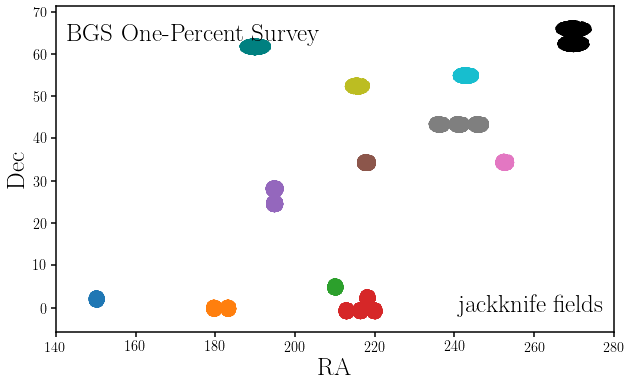

In [14]:
fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)
#sub.scatter(bgs['RA'], bgs['DEC'], s=1)
for field in fields[:-2]: 
    sub.scatter(bgs['RA'][field], bgs['DEC'][field], s=1, rasterized=True)
sub.scatter(bgs['RA'][fields[-1]], bgs['DEC'][fields[-1]], s=1, c='k', rasterized=True)    
sub.scatter(bgs['RA'][fields[-2]], bgs['DEC'][fields[-2]], s=1, c='teal', rasterized=True)    

sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(140, 280)
sub.set_ylabel('Dec', fontsize=25)
#sub.set_ylim(-10, 10)
sub.text(0.02, 0.95, 'BGS One-Percent Survey', ha='left', va='top', fontsize=25, transform=sub.transAxes)
sub.text(0.98, 0.05, 'jackknife fields', 
         ha='right', va='bottom', fontsize=25, transform=sub.transAxes)
fig.savefig('../figs/jackknife_fields.pdf', bbox_inches='tight')